In [1]:
using JLD2
using LinearAlgebra
using Plots
using LatticeAlgorithms

In [2]:
check_if_nan(num) = num <= 0 ? NaN : num

"""
    find_best_achievalble_rate(c_list, σrange, drange, num_modes_range)

Return the best achievable rate for a given σ for a range of distance

Args:
    c_list: The coherent information for a set of (d,σ)
    σrange: The range of σ
    drange: The range of d
    num_modes_range: The range of number of modes

Returns:
    ds: The optimal distance for each σ
    cs: The optimal achievable rate for each σ

Notes: The achievable rate is max(0, coherent-information divided by the number of modes)
"""    
function find_best_achievalble_rate(c_list, σrange, drange, num_modes_range)
    ds = Dict()
    cs = Dict()
    
    for σ in σrange
        c_list_2 = Dict(d => c_list[[σ, d]] for d in drange)
        c_list_3 = check_if_nan.(collect(values(sort(c_list_2))) ./ num_modes_range)
        c_list_3[isnan.(c_list_3)] .= -Inf
        if c_list_3 == [-Inf for _ in c_list_3]
            ds[σ] = NaN
            cs[σ] = NaN
        else
            dind = findmax(c_list_3)[2]
            d = drange[dind]
            ds[σ] = d
            cs[σ] = c_list_3[dind]
        end
    end    
    return ds, cs
end

find_best_achievalble_rate

In [10]:
function get_p0list_sorted(p_list, drange, σrange)
    p0list_sorted = sort(p_list)
    p0list_sorted = collect(values(p0list_sorted))
    p0list_sorted = reshape(p0list_sorted, (length(drange), length(σrange)))
    p0list_sorted = [p0list_sorted[:,i] for i in 1:size(p0list_sorted,2)]
    return p0list_sorted
end


crossing(x1, x2, y1,y2, y3,y4) = (x2/(x2-x1) * (y4-y1-y3+y2)+y1-y2) / ((y4-y1-y3+y2)/(x2-x1))

function get_crossing(sorted_p0list, d_ind, σrange)
    diff = [item[d_ind] for item in sorted_p0list] - [item[d_ind+1] for item in sorted_p0list]
    ind_1st_positive = findfirst(x->x>0, diff)
    
    σ1 = σrange[ind_1st_positive-1]
    σ2 = σrange[ind_1st_positive]    
    y1 = sorted_p0list[ind_1st_positive][d_ind+1]
    y2 = sorted_p0list[ind_1st_positive][d_ind]
    y3 = sorted_p0list[ind_1st_positive-1][d_ind]
    y4 = sorted_p0list[ind_1st_positive-1][d_ind+1]    
    
    return crossing(σ1, σ2, y1, y2, y3, y4)
end

get_crossing (generic function with 1 method)

In [11]:
data_color_sq_3_21 = load("color_square_3_21_0.0_2.0_1.0_128_10016000.jld2")

p_list = data_color_square["p_list"]
drange = data_color_square["drange"]
σrange = data_color_square["σrange"];


println(drange)
println(σrange)

sorted_p_list = get_p0list_sorted(p_list, drange, σrange)

3:2:21
[0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.591, 0.592, 0.593, 0.594, 0.595, 0.596, 0.597, 0.598, 0.599, 0.6]


20-element Vector{Vector{Float64}}:
 [0.9569369009584665, 0.9768887779552715, 0.9881045327476038, 0.9940324480830671, 0.9970936501597444, 0.9986500599041533, 0.9993322683706071, 0.9992888378594249, 0.996714856230032, 0.9859451876996805]
 [0.9489872204472843, 0.9700392372204473, 0.9827972244408946, 0.9904074480830671, 0.9947884384984026, 0.9972093650159745, 0.9985409345047923, 0.9992009784345048, 0.999201178115016, 0.9970766773162939]
 [0.9402800519169329, 0.9618707068690096, 0.9761192092651757, 0.9852018769968051, 0.9911124201277955, 0.994702875399361, 0.9968663138977636, 0.9981563498402556, 0.9988944688498402, 0.9990336461661342]
 [0.9309818290734825, 0.9521872004792332, 0.9673909744408946, 0.9780694888178914, 0.9854098442492013, 0.9904141373801917, 0.9938201876996805, 0.9960001996805112, 0.9974048522364217, 0.998298821884984]
 [0.9206670327476039, 0.9414936102236422, 0.9569505790734825, 0.9686078274760384, 0.9773715055910543, 0.9838789936102237, 0.9884838258785943, 0.9918364616613419

In [12]:
data_color_sq_3_21 = load("../tn_color_square_3_21_128_10016000.jld2")
p_list = data_color_square["p_list"]
drange = data_color_square["drange"]
σrange = data_color_square["σrange"];


println(drange)
println(σrange)

sorted_p_list = get_p0list_sorted(p_list, drange, σrange)

3:2:21
[0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.591, 0.592, 0.593, 0.594, 0.595, 0.596, 0.597, 0.598, 0.599, 0.6]


20-element Vector{Vector{Float64}}:
 [0.9569369009584665, 0.9768887779552715, 0.9881045327476038, 0.9940324480830671, 0.9970936501597444, 0.9986500599041533, 0.9993322683706071, 0.9992888378594249, 0.996714856230032, 0.9859451876996805]
 [0.9489872204472843, 0.9700392372204473, 0.9827972244408946, 0.9904074480830671, 0.9947884384984026, 0.9972093650159745, 0.9985409345047923, 0.9992009784345048, 0.999201178115016, 0.9970766773162939]
 [0.9402800519169329, 0.9618707068690096, 0.9761192092651757, 0.9852018769968051, 0.9911124201277955, 0.994702875399361, 0.9968663138977636, 0.9981563498402556, 0.9988944688498402, 0.9990336461661342]
 [0.9309818290734825, 0.9521872004792332, 0.9673909744408946, 0.9780694888178914, 0.9854098442492013, 0.9904141373801917, 0.9938201876996805, 0.9960001996805112, 0.9974048522364217, 0.998298821884984]
 [0.9206670327476039, 0.9414936102236422, 0.9569505790734825, 0.9686078274760384, 0.9773715055910543, 0.9838789936102237, 0.9884838258785943, 0.9918364616613419

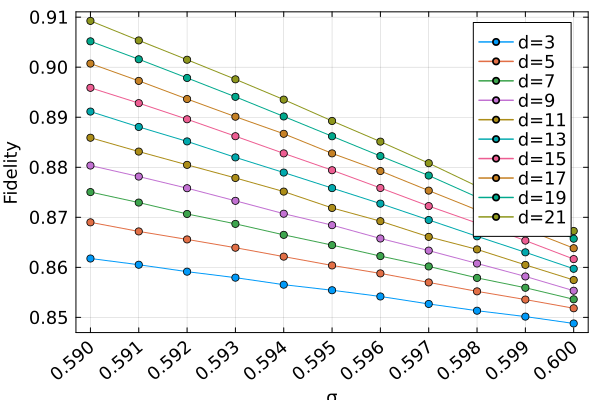

In [15]:
plot()
σinds = 10:20
dinds = 1:10

for ind_d in dinds
    d = drange[ind_d]
    
    fidelity = [item[ind_d] for item in sorted_p_list][σinds]
    all(isnan, fidelity) && continue
    plot!(σrange[σinds], fidelity, marker=:circle, label="d=$d")
end

plot!(xlabel="σ", 
    ylabel="Fidelity", 
    xticks=round.(σrange[σinds], digits=3),
    # grid=false,
    tickfontsize=12,
    xrotation = 40,
    labelfontsize=12,
    framestyle = :box,
    legendfontsize=12,
    legend=:topright
)


In [44]:
sorted_p_list_2 = [sorted_p_list[i][dinds] for i in σinds] # subset of data

11-element Vector{Vector{Float64}}:
 [0.8617660742811502, 0.8689962060702875, 0.8750434305111822, 0.8803448482428115, 0.8859009584664537, 0.8911283945686901, 0.8958789936102236, 0.9007244408945687, 0.9051666333865814, 0.9092520966453674]
 [0.8605220646964856, 0.8671776158146964, 0.8729464856230031, 0.8781432707667731, 0.8831360822683706, 0.8880587060702876, 0.892816892971246, 0.8972630790734825, 0.9015812699680511, 0.9053441493610224]
 [0.8591373801916933, 0.8655772763578274, 0.8706708266773163, 0.8758157947284345, 0.8804807308306709, 0.8851675319488818, 0.8895911541533547, 0.8936391773162939, 0.897846944888179, 0.9014881190095847]
 [0.8579394968051118, 0.8639241214057508, 0.8686871006389776, 0.8732938298722045, 0.87786232028754, 0.8819710463258786, 0.8862046725239616, 0.8901036341853035, 0.8940745806709265, 0.897576178115016]
 [0.8565360423322683, 0.8621437699680511, 0.8664954073482428, 0.87071875, 0.8751397763578275, 0.8789432907348242, 0.8827737619808307, 0.8866883985623003, 0.89015

In [45]:
# Push in two more sigma values
added_number_σs = 10
for _ in 1 : added_number_σs
    push!(sorted_p_list_2, [NaN for _ in sorted_p_list_2[1]])
end

for i in 1 : length(sorted_p_list_2[1])
    fidelity = [item[i] for item in sorted_p_list_2[1:11]]
    slope = (fidelity[end]-fidelity[1]) / (0.600 - 0.590)

    for j in 1 : added_number_σs
        sorted_p_list_2[length(fidelity)+j][i] = fidelity[end] + j * slope * 0.001
    end
end
sorted_p_list_2

21-element Vector{Vector{Float64}}:
 [0.8617660742811502, 0.8689962060702875, 0.8750434305111822, 0.8803448482428115, 0.8859009584664537, 0.8911283945686901, 0.8958789936102236, 0.9007244408945687, 0.9051666333865814, 0.9092520966453674]
 [0.8605220646964856, 0.8671776158146964, 0.8729464856230031, 0.8781432707667731, 0.8831360822683706, 0.8880587060702876, 0.892816892971246, 0.8972630790734825, 0.9015812699680511, 0.9053441493610224]
 [0.8591373801916933, 0.8655772763578274, 0.8706708266773163, 0.8758157947284345, 0.8804807308306709, 0.8851675319488818, 0.8895911541533547, 0.8936391773162939, 0.897846944888179, 0.9014881190095847]
 [0.8579394968051118, 0.8639241214057508, 0.8686871006389776, 0.8732938298722045, 0.87786232028754, 0.8819710463258786, 0.8862046725239616, 0.8901036341853035, 0.8940745806709265, 0.897576178115016]
 [0.8565360423322683, 0.8621437699680511, 0.8664954073482428, 0.87071875, 0.8751397763578275, 0.8789432907348242, 0.8827737619808307, 0.8866883985623003, 0.89015

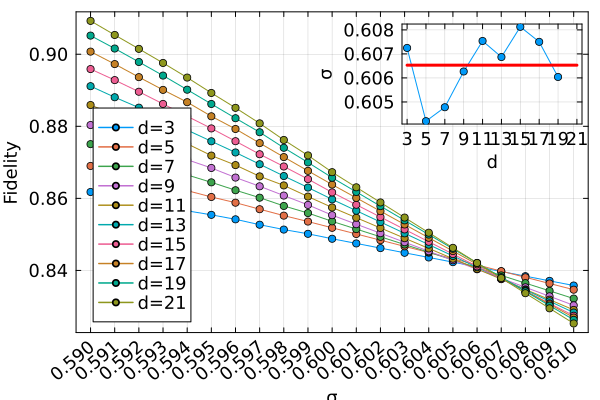

In [47]:
# σinds2 = σinds[1]:(σinds[end]+added_number_σs)
σrange2 = σrange[σinds]
for _ in 1 : added_number_σs
    push!(σrange2, σrange2[end] + 0.001)
end

drange2 = drange[dinds] # 3:2:21

crossings = [get_crossing(sorted_p_list_2, d_ind, σrange2) for d_ind in 1 : length(drange2)-1]

σ_inds = 1:length(σrange2)

plot()
for (i, d) in enumerate(drange2)
    fidelity = [item[i] for item in sorted_p_list_2]
    all(isnan, fidelity) && continue
    plot!(σrange2[σ_inds], fidelity[σ_inds], marker=:circle, label="d=$d")
end

plot!(xlabel="σ", 
    ylabel="Fidelity", 
    xticks=round.(σrange2, digits=3),
    # grid=false,
    tickfontsize=12,
    xrotation = 40,
    labelfontsize=12,
    framestyle = :box,
    legendfontsize=12,
    legend=:bottomleft,
)

plot!(subplot=2,
    inset = bbox(0.03, 0.06, 0.3, 0.25, :top, :right),
    # grid = false,
    legend=false,
    tickfontsize=12,
    labelfontsize=12,
    ylabel="σ",
    xlabel="d",
    framestyle = :box,
    xticks=drange2,
)

plot!(drange2[1:end-1], 
    crossings, 
    marker=:circle,
    subplot = 2
)

plot!([drange2[1], drange2[end]], [exp(-1/2), exp(-1/2)], subplot = 2, color=:red, linewidth=3)
